In [1]:
%matplotlib inline

In [2]:
pip install numpy

In [3]:
#NEWCOMMENTS
#Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [4]:
# Files to load
overall_homeless_data_to_load = "Resources/MD_County_Homeless.csv"
homeless_by_county__data_to_load = "Resources/MD_Homeless_PerCounty.csv"

In [5]:
# Read School and Student Data Files and store into Pandas DataFrames
overall_homeless_data = pd.read_csv(overall_homeless_data_to_load) 
homeless_by_county_data = pd.read_csv(homeless_by_county__data_to_load)

In [6]:
# Combine overall homeless and homeless by county data into a single dataset.  
homeless_data_complete = pd.merge(overall_homeless_data, homeless_by_county_data, how="left", on=["County_ID", "County_ID"])

#homeless_data_complete.apply(lambda x: x.str.replace(',', '').astype(float), axis=1)
#df.read_csv('foo.tsv', sep='\t', thousands=',')

homeless_data_complete

,County_ID,County_name,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Med_HH_Income_Percent_of_State_Total,Overall Homeless 2019,Overall Homeless 2018,...,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Non-Hispanic,Overall Homeless - Hispanic/Latino,Overall Homeless - White,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,MD-500,Allegany County,"32,253","30,618","1,635",5.1,"48,170",55.6,145,79,...,98,47,145,0,119,14,0,0,0,12
1,MD-501,Baltimore city,"287,760","273,351","14,409",5.0,"49,780",57.5,"2,294","2,508",...,631,"1,660","2,234",60,602,"1,609",15,25,8,35
2,MD-502,Harford County,"143,572","138,927","4,645",3.2,"91,492",105.6,228,190,...,100,127,204,24,116,83,1,2,0,26
3,MD-503,Anne Arundel County,"321,069","311,556","9,513",3.0,"100,916",116.5,302,366,...,112,189,296,6,164,118,1,1,0,18
4,MD-504,Howard County,"191,529","186,427","5,102",2.7,"121,329",140.0,201,168,...,93,107,192,9,45,132,2,5,1,16
5,MD-505,Baltimore County,"459,091","442,597","16,494",3.6,"76,972",88.8,735,758,...,344,391,723,12,253,439,3,4,1,35
6,MD-506,Carroll County,"96,933","94,187","2,746",2.8,"101,810",117.5,144,173,...,57,84,141,3,111,15,0,2,0,16
7,MD-507,Cecil County,"53,891","51,812","2,079",3.9,"75,307",86.9,126,129,...,34,92,119,7,91,30,0,0,0,5
8,MD-508,"Charles, Calvert, St.Mary's Counties","65,682","63,492","2,190",3.0,"100,896",116.0,306,492,...,125,170,304,2,114,175,1,2,1,13
9,MD-509,Frederick County,"137,920","133,683","4,237",3.1,"102,951",118.8,286,316,...,82,204,272,14,183,81,2,0,0,20


In [7]:
#homeless_data_complete.columns

In [8]:
homeless_col=['Civilian_labor_force', 'Employed',
       'Unemployed', 'Unemployment_rate', 'Median_Household_Income',
       'Med_HH_Income_Percent_of_State_Total', 'Overall Homeless 2019',
       'Overall Homeless 2018', 'Overall Homeless 2017',
       'Overall Homeless 2016', 'Overall Homeless 2015',
       'Overall Homeless - Under 18 ', 'Overall Homeless - Age 18 to 24',
       'Overall Homeless - Over 24', 'Overall Homeless - Female',
       'Overall Homeless - Male', 'Overall Homeless - Non-Hispanic',
       'Overall Homeless - Hispanic/Latino', 'Overall Homeless - White',
       'Overall Homeless - Black or African American',
       'Overall Homeless - Asian',
       'Overall Homeless - American Indian or Alaska Native',
       'Overall Homeless - Native Hawaiian or Other Pacific Islander',
       'Overall Homeless - Multiple Races']

In [9]:
for i in homeless_col:
    try:
        #print(i)
        #print(homeless_data_complete[i])
        homeless_data_complete[i]= homeless_data_complete[i].str.replace(',', '').astype(float)
    
    except:
        #print("Error")
        pass

In [10]:
homeless_data_complete.head()

,County_ID,County_name,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Med_HH_Income_Percent_of_State_Total,Overall Homeless 2019,Overall Homeless 2018,...,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Non-Hispanic,Overall Homeless - Hispanic/Latino,Overall Homeless - White,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,MD-500,Allegany County,32253.0,30618.0,1635.0,5.1,48170.0,55.6,145.0,79.0,...,98,47.0,145.0,0,119,14.0,0,0,0,12
1,MD-501,Baltimore city,287760.0,273351.0,14409.0,5.0,49780.0,57.5,2294.0,2508.0,...,631,1660.0,2234.0,60,602,1609.0,15,25,8,35
2,MD-502,Harford County,143572.0,138927.0,4645.0,3.2,91492.0,105.6,228.0,190.0,...,100,127.0,204.0,24,116,83.0,1,2,0,26
3,MD-503,Anne Arundel County,321069.0,311556.0,9513.0,3.0,100916.0,116.5,302.0,366.0,...,112,189.0,296.0,6,164,118.0,1,1,0,18
4,MD-504,Howard County,191529.0,186427.0,5102.0,2.7,121329.0,140.0,201.0,168.0,...,93,107.0,192.0,9,45,132.0,2,5,1,16


In [11]:
df1 = homeless_data_complete[["County_name","Overall Homeless - White","Overall Homeless - Black or African American","Overall Homeless - Asian","Overall Homeless - American Indian or Alaska Native","Overall Homeless - Native Hawaiian or Other Pacific Islander","Overall Homeless - Multiple Races"]]

In [12]:
df1.head()

,County_name,Overall Homeless - White,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,Allegany County,119,14.0,0,0,0,12
1,Baltimore city,602,1609.0,15,25,8,35
2,Harford County,116,83.0,1,2,0,26
3,Anne Arundel County,164,118.0,1,1,0,18
4,Howard County,45,132.0,2,5,1,16


Text(0, 0.5, '# of Homeless')

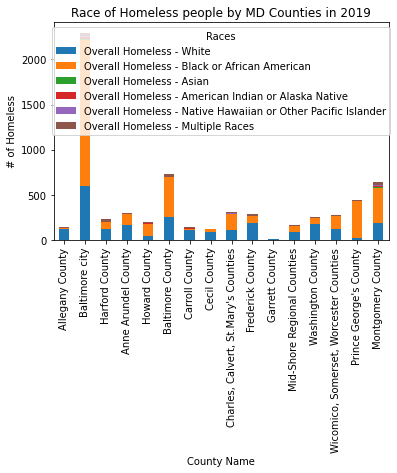

In [13]:
# plot data in stack manner of bar type
df1.plot(x='County_name', kind='bar', stacked=True,
        title='Race of Homeless people by MD Counties in 2019').legend(loc='upper center', title="Races")
plt.xlabel("County Name")
plt.ylabel("# of Homeless")
#plt.savefig("Resources/Race of Homeless people by MD Counties in 2019.png")

In [14]:
labels = "White", "Asian", "Black or African American",  "Native Hawaiian or Other Pacific Islander",   "Multiple Race", "American Indian or Alaska Native",
colors = ["red", "blue", "lightgreen", "pink", "purple","orange"]

In [15]:
#BlackN = int(homeless_data_complete["Overall Homeless - Black or African American"])

White = homeless_data_complete["Overall Homeless - White"].sum()
Black = homeless_data_complete["Overall Homeless - Black or African American"].sum()
Asian = homeless_data_complete["Overall Homeless - Asian"].sum()
AmerInd = homeless_data_complete["Overall Homeless - American Indian or Alaska Native"].sum()
NatHaw = homeless_data_complete["Overall Homeless - Native Hawaiian or Other Pacific Islander"].sum()
MultiRace = homeless_data_complete["Overall Homeless - Multiple Races"].sum()

<Figure size 1080x216 with 0 Axes>

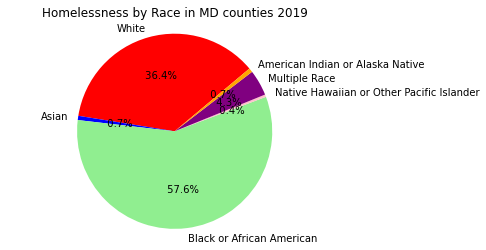

In [18]:
homelessMD = [White, Asian, Black, NatHaw, MultiRace, AmerInd]

plt.figure(figsize = (15,3))
fig1, ax1 = plt.subplots()

ax1.pie(homelessMD, labels=labels, colors=colors, radius=20, autopct='%5.1f%%', startangle=40, shadow=False)

ax1.axis('equal')
plt.title("Homelessness by Race in MD counties 2019")
#plt.savefig("Resources/Homeless by MD counties - pie.png")
plt.show()

# Plot aBar Chart for unemployment per county

In [19]:
# Filter the DataFrame down only to those columns to chart
county_and_unemployment = homeless_data_complete[["County_name","Overall Homeless 2019"]]

# Set the index to be "State" so they will be used as labels
#county_and_unemployment = state_and_inches.set_index("State")

county_and_unemployment.head()

,County_name,Overall Homeless 2019
0,Allegany County,145.0
1,Baltimore city,2294.0
2,Harford County,228.0
3,Anne Arundel County,302.0
4,Howard County,201.0


In [20]:
counties = ["Allegany County","Baltimore city","Harford County","Anne Arundel County","Howard County","Baltimore County","Carroll County","Cecil County","Charles, Calvert, St.Mary's Counties","Frederick County","Garrett County","Mid-Shore Regional Counties","Washington County","Wicomico, Somerset, Worcester Counties","Prince George's County","Montgomery County"]

x_axis = np.arange(0, len(counties))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

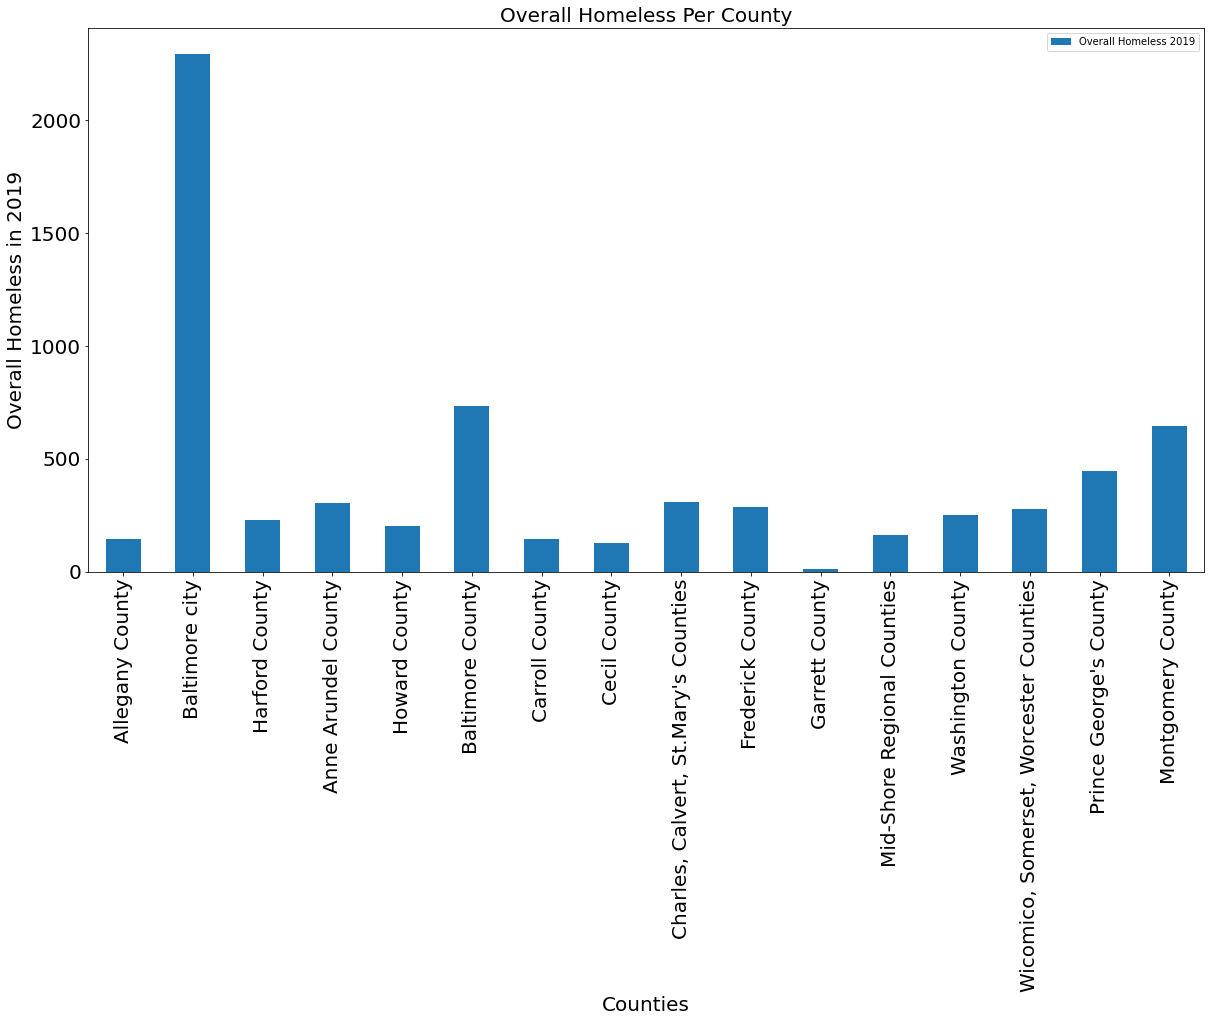

<Figure size 432x288 with 0 Axes>

In [21]:
# Use DataFrame.plot() in order to create a bar chart of the data
county_and_unemployment.plot(kind="bar", figsize=(20,10), fontsize = 20)

# Set a title for the chart
plt.title("Overall Homeless Per County", fontsize = 20)
plt.xlabel("Counties", fontsize =20)
plt.ylabel("Overall Homeless in 2019", fontsize = 20)

#Locate x-axis heaaders
plt.xticks(tick_locations, counties, rotation = "vertical")
plt.show()


plt.show()
plt.tight_layout()

## Perform trend analysis for homeless over a five year period (2015 - 2019)

* Transpose DataFrame
* Plot trend lines
* Write a brief analysis

In [25]:
#Create a new dataFrame
years_df = homeless_data_complete[["County_name","Overall Homeless 2015","Overall Homeless 2016","Overall Homeless 2017","Overall Homeless 2018","Overall Homeless 2019"]]

#Transpose DataFrame
years_df.set_index('County_name',inplace=True)
years_df_transposed = years_df.T # or df1.transpose()
years_df.T

County_name,Allegany County,Baltimore city,Harford County,Anne Arundel County,Howard County,Baltimore County,Carroll County,Cecil County,"Charles, Calvert, St.Mary's Counties",Frederick County,Garrett County,Mid-Shore Regional Counties,Washington County,"Wicomico, Somerset, Worcester Counties",Prince George's County,Montgomery County
Overall Homeless 2015,96.0,2796.0,210.0,335.0,166.0,745.0,140.0,191.0,981.0,311.0,9.0,158.0,201.0,326.0,625.0,1100.0
Overall Homeless 2016,124.0,2725.0,179.0,390.0,214.0,763.0,136.0,167.0,464.0,349.0,20.0,138.0,233.0,262.0,544.0,981.0
Overall Homeless 2017,118.0,2669.0,189.0,376.0,168.0,609.0,147.0,193.0,419.0,309.0,10.0,153.0,208.0,260.0,525.0,894.0
Overall Homeless 2018,79.0,2508.0,190.0,366.0,168.0,758.0,173.0,129.0,492.0,316.0,15.0,141.0,199.0,292.0,478.0,840.0
Overall Homeless 2019,145.0,2294.0,228.0,302.0,201.0,735.0,144.0,126.0,306.0,286.0,12.0,164.0,249.0,275.0,447.0,647.0


In [26]:
# Rename the transposed DataFrame
trend_df = years_df.T

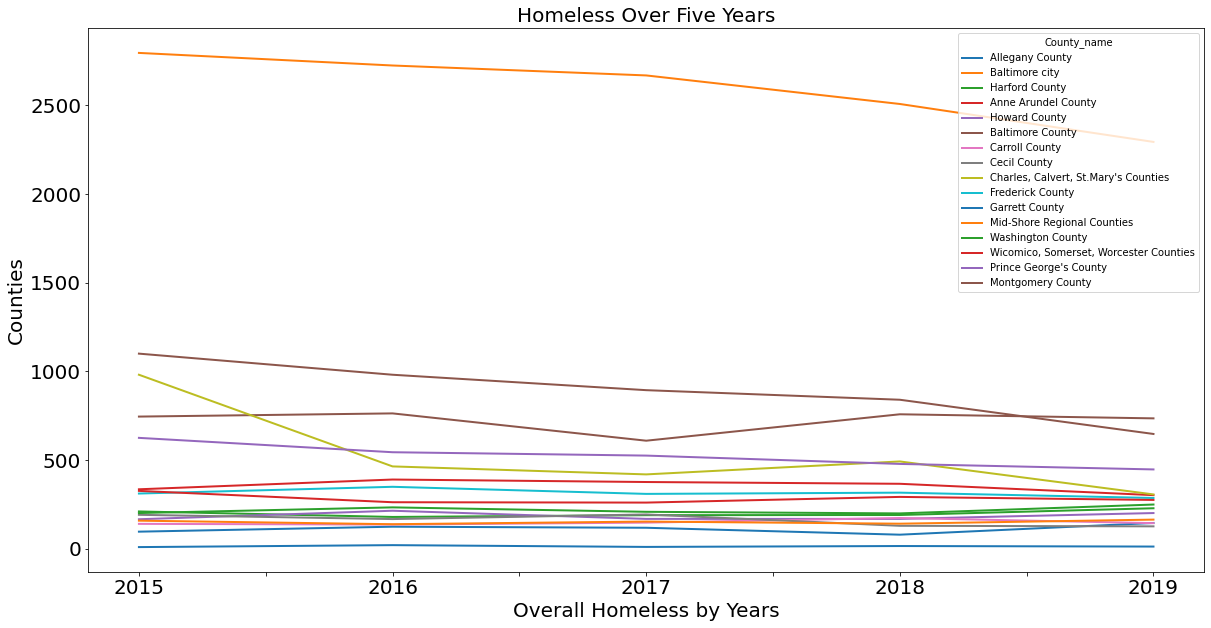

In [29]:
#Plot a trend analysis graph
trend_df.index=["2015", "2016", "2017", "2018", "2019"]
trend_df.plot(figsize=(20,10), linewidth=2, fontsize=20)

#set labels
plt.title("Homeless Over Five Years",fontsize=20)
plt.xlabel("Overall Homeless by Years",fontsize=20)
plt.ylabel("Counties",fontsize=20)

# Show plot
plt.show() 

In [41]:
years_df = homeless_data_complete[["County_name","Overall Homeless 2015","Overall Homeless 2016","Overall Homeless 2017","Overall Homeless 2018","Overall Homeless 2019"]]

years_df.head(16)
years_df.set_index('County_name',inplace=True)
years_df_transposed = years_df.T # or df1.transpose()
years_df.T


County_name,Allegany County,Baltimore city,Harford County,Anne Arundel County,Howard County,Baltimore County,Carroll County,Cecil County,"Charles, Calvert, St.Mary's Counties",Frederick County,Garrett County,Mid-Shore Regional Counties,Washington County,"Wicomico, Somerset, Worcester Counties",Prince George's County,Montgomery County
Overall Homeless 2015,96.0,2796.0,210.0,335.0,166.0,745.0,140.0,191.0,981.0,311.0,9.0,158.0,201.0,326.0,625.0,1100.0
Overall Homeless 2016,124.0,2725.0,179.0,390.0,214.0,763.0,136.0,167.0,464.0,349.0,20.0,138.0,233.0,262.0,544.0,981.0
Overall Homeless 2017,118.0,2669.0,189.0,376.0,168.0,609.0,147.0,193.0,419.0,309.0,10.0,153.0,208.0,260.0,525.0,894.0
Overall Homeless 2018,79.0,2508.0,190.0,366.0,168.0,758.0,173.0,129.0,492.0,316.0,15.0,141.0,199.0,292.0,478.0,840.0
Overall Homeless 2019,145.0,2294.0,228.0,302.0,201.0,735.0,144.0,126.0,306.0,286.0,12.0,164.0,249.0,275.0,447.0,647.0


The graph analyses homeless trends by county over a five year period.  Baltimore County has the highest unemployment rate, which has been on a steady decline from 2796 in 2015 to 2294 homeless people in 2019.  Also Montgomery County, Charles, Calvert, St. Mary’s Counties and Prince George's County’ homeless numbers have been declining steadily from 1100, 981, 625 to 647, 306, 447 respectively. Other counties have had insignificant fluctuations over time, except for Baltimore County that shows a significant reduction in numbers in 2017, which “adjusted back” to the normal range the following year.  Our assumption was that there may have been under-reporting in 2017 or some temporary special sheltering program that accommodated +100 people.